<a href="https://colab.research.google.com/github/reddy26lc/Deep-Learning-and-NLP/blob/main/Creating_CNN_model_using_Transfer_Learning_VGG16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [3]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

In [5]:
train_path = '/content/drive/My Drive/Colab Notebooks/MyImages/MyImages/Train_Data'
valid_path = '/content/drive/My Drive/Colab Notebooks/MyImages/MyImages/Test_Data'

In [6]:
# add preprocessing layer to the front of VGG
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

58892288/58889256 [==============================] - 1s 0us/step


In [7]:
# don't train existing weights
for layer in vgg.layers:
  layer.trainable = False

In [9]:
folders = glob('/content/drive/My Drive/Colab Notebooks/MyImages/MyImages/Train_Data/*')

In [11]:
# our layers - you can add more if you want
x = Flatten()(vgg.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

In [12]:

# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

In [13]:
# view the structure of the model
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

In [14]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [15]:
from keras.preprocessing.image import ImageDataGenerator

In [16]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [17]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [18]:
training_set = train_datagen.flow_from_directory('/content/drive/My Drive/Colab Notebooks/MyImages/MyImages/Train_Data',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 14 images belonging to 5 classes.


In [19]:
test_set = test_datagen.flow_from_directory('/content/drive/My Drive/Colab Notebooks/MyImages/MyImages/Test_Data',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 14 images belonging to 5 classes.


In [20]:
'''r=model.fit_generator(training_set,
                         samples_per_epoch = 8000,
                         nb_epoch = 5,
                         validation_data = test_set,
                         nb_val_samples = 2000)'''

'r=model.fit_generator(training_set,\n                         samples_per_epoch = 8000,\n                         nb_epoch = 5,\n                         validation_data = test_set,\n                         nb_val_samples = 2000)'

In [21]:
# fit the model
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/5
1/1 [==============================] - 11s 11s/step - loss: 2.0149 - accuracy: 0.1429 - val_loss: 2.0065 - val_accuracy: 0.5000
Epoch 2/5
1/1 [==============================] - 7s 7s/step - loss: 1.6959 - accuracy: 0.5714 - val_loss: 2.6445 - val_accuracy: 0.3571
Epoch 3/5
1/1 [==============================] - 7s 7s/step - loss: 1.6714 - accuracy: 0.5000 - val_loss: 1.6353 - val_accuracy: 0.4286
Epoch 4/5
1/1 [==============================] - 7s 7s/step - loss: 0.6432 - accuracy: 0.7857 - val_loss: 0.8449 - val_accuracy: 0.6429
Epoch 5/5
1/1 [==============================] - 7s 7s/step - loss: 0.2076 - accuracy: 1.0000 - val_loss: 0.9922 - val_accuracy: 0.5000


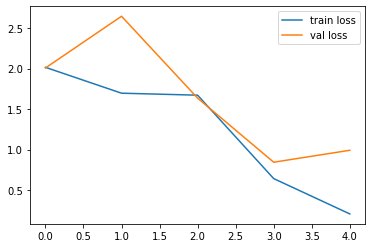

<Figure size 432x288 with 0 Axes>

In [22]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

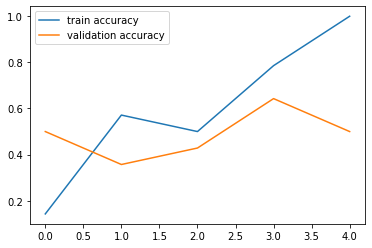

<Figure size 432x288 with 0 Axes>

In [25]:
# accuracies
plt.plot(r.history['accuracy'], label='train accuracy')
plt.plot(r.history['val_accuracy'], label='validation accuracy')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [27]:
import tensorflow as tf

from keras.models import load_model

model.save('facefeatures_new_model.h5')